In [1]:
# Load data ke dalam data frame 
import pandas as pd

# spesifikasi encoding diperlukan karena data tidak menggunakan UTF-8
df = pd.read_csv('allreview_clean.csv', encoding='latin-1') 

df.head()

,review_tokens_stemmed,sentimen,classified_text,tweet_text,sentence_score,max_positive,max_negative,kelas
0,kulit kerut,"{'classified_text': 'kulit kerut [-2]', 'tweet...",kulit kerut [-2],kulit kerut,['kulit kerut [-2]'],1,-2,negatif
1,tipe kulit kering,"{'classified_text': 'tipe kulit kering', 'twee...",tipe kulit kering,tipe kulit kering,['tipe kulit kering'],1,-1,netral
2,bagus banget lip tint nya warna bagus kemas ge...,{'classified_text': 'bagus [5] banget lip tint...,bagus [5] banget lip tint nya warna bagus [4] ...,bagus banget lip tint nya warna bagus kemas g...,['bagus [5] banget lip tint nya warna bagus [4...,5,-1,positif
3,expire kirim cepat cocok guna sesuai instruksi,{'classified_text': 'expire kirim cepat [4] co...,expire kirim cepat [4] cocok [4] guna sesuai [...,expire kirim cepat cocok guna sesuai instruksi,['expire kirim cepat [4] cocok [4] guna sesuai...,4,-1,positif
4,no review found,"{'classified_text': 'no review found', 'tweet_...",no review found,no review found,['no review found'],1,-1,netral


In [2]:
# Drop 3 kolom terakhir yang tidak digunakan dengan fungsi iloc
df = df.drop(df.iloc[:,1:7], axis=1)

# Cek data teratas
df.head()

,review_tokens_stemmed,kelas
0,kulit kerut,negatif
1,tipe kulit kering,netral
2,bagus banget lip tint nya warna bagus kemas ge...,positif
3,expire kirim cepat cocok guna sesuai instruksi,positif
4,no review found,netral


In [3]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'review_tokens_stemmed' : 'Review',
    'kelas' : 'Sentiment'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# Cek data teratas
df.head()

,Review,Sentiment
0,kulit kerut,negatif
1,tipe kulit kering,netral
2,bagus banget lip tint nya warna bagus kemas ge...,positif
3,expire kirim cepat cocok guna sesuai instruksi,positif
4,no review found,netral


In [4]:
# Cek jumlah data per kelas
print(df['Sentiment'].value_counts())
print('\n')

# Cek kelengkapan data
print(df.info())
print('\n')

# Cek statistik deskriptif
print(df.describe())

positif    1129
netral      358
negatif     133
Name: Sentiment, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     1620 non-null   object
 1   Sentiment  1620 non-null   object
dtypes: object(2)
memory usage: 25.4+ KB
None


                 Review Sentiment
count              1620      1620
unique             1499         3
top     coba moga cocok   positif
freq                 16      1129


In [5]:
# Data untuk label
new_labels = {
    'negatif' : 0,
    'netral' : 1,
    'positif' : 2
}

# Encode label (mengubah label dari spam dan ham menjadi 1 dan 0)
df['Sentiment'] = df['Sentiment'].map(new_labels)

# Cek data teratas
df.head()

,Review,Sentiment
0,kulit kerut,0
1,tipe kulit kering,1
2,bagus banget lip tint nya warna bagus kemas ge...,2
3,expire kirim cepat cocok guna sesuai instruksi,2
4,no review found,1


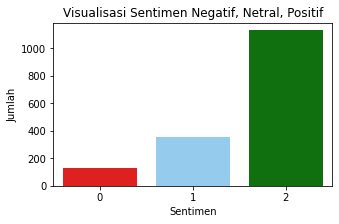

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualisasi sentimen positif, netral, dan negatif
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Sentiment', palette={0: 'red', 1: 'lightskyblue', 2: 'green'})
plt.title('Visualisasi Sentimen Negatif, Netral, Positif')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [8]:
# Memisahkan fitur dengan label
X = df['Review'].values
y = df['Sentiment'].values

In [9]:
# Ekstraksi fitur
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisiasi TfidfVectorizer
bow = TfidfVectorizer(max_features=510)

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# X_test hanya transform (bukan fit_transform) karena agar model tidak mengetahui parameter yang 
# digunakan oleh CountVectorizer untuk fitting data X_test
# sehingga data testing tetap menjadi data yang asing bagi model
X_test = bow.transform(X_test)

In [10]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

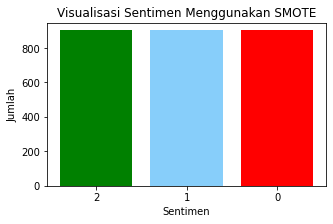

In [12]:
# visualisasi hasil resampling
# Convert NumPy array to pandas Series
y_train_resampled_series = pd.Series(y_train_resampled)

# Visualisasi hasil resampling
sentimen_counts = y_train_resampled_series.value_counts()

plt.figure(figsize=(5, 3))
plt.bar(sentimen_counts.index, sentimen_counts.values, color=['red', 'lightskyblue', 'green'])
plt.title('Visualisasi Sentimen Menggunakan SMOTE')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(sentimen_counts.index, ['0', '1', '2'])
plt.show()

In [13]:
# Training dan evaluasi model
# menggunakan algoritma Multinomial Naive Bayes (fungsi MultinomialNB dari scikit-learn)
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Fit Model ke MultinomialNB
mnb = MultinomialNB().fit(X_train_resampled, y_train_resampled)

# Prediksi dengan data testing
predicted = mnb.predict(X_test)

# Print hasil evaluasi
print('Accuracy : ', accuracy_score(y_test, predicted))
print('Precision : ', precision_score(y_test, predicted, average='weighted'))
print('Recall : ', recall_score(y_test, predicted, average='weighted'))
print('F1 Score : ', f1_score(y_test, predicted, average='weighted'))

print(f'Confusion Matrix : \n {confusion_matrix(y_test, predicted)}')
print('-----------------------------------------------------\n')
print(classification_report(y_test, predicted, target_names=['negatif', 'netral', 'positif'], zero_division=0))

Accuracy :  0.7253086419753086
Precision :  0.7510129861662429
Recall :  0.7253086419753086
F1 Score :  0.7283955923518826
Confusion Matrix : 
 [[ 17   7   3]
 [ 25  22  23]
 [ 16  15 196]]
-----------------------------------------------------

              precision    recall  f1-score   support

     negatif       0.29      0.63      0.40        27
      netral       0.50      0.31      0.39        70
     positif       0.88      0.86      0.87       227

    accuracy                           0.73       324
   macro avg       0.56      0.60      0.55       324
weighted avg       0.75      0.73      0.73       324



HEATMAP


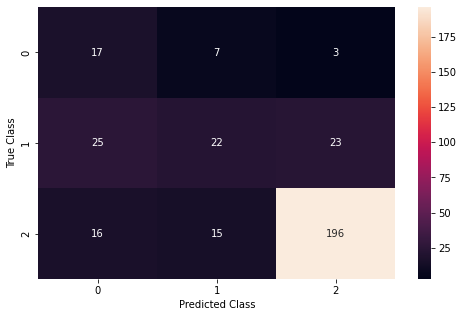

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(metrics.confusion_matrix(y_test, predicted), annot=True, fmt=".0f", ax=ax)
print("HEATMAP")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [19]:
new_text = input("\nMasukkan teks baru: ")
new_text_vec = bow.transform([new_text])
predicted_sentimen = mnb.predict(new_text_vec)

if predicted_sentimen[0] == 0:
    sentiment_label = "negatif"
elif predicted_sentimen[0] == 1:
    sentiment_label = "netral"
elif predicted_sentimen[0] == 2:
    sentiment_label = "positif"

print("Hasil Analisis Sentimen untuk Teks Baru : ", sentiment_label)

Hasil Analisis Sentimen untuk Teks Baru :  negatif
